## CFChemDb demo - cheminformatics db and development system

Jeremy Yang

Common Fund Data Ecosystem (CFDE)

* https://github.com/nih-cfde
* https://github.com/druggablegenome/idg-cfde
* https://github.com/jeremyjyang/rdkit-tools

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import rdktools
import rdktools.db
import rdktools.util

In [2]:
dbcon = rdktools.util.db.Connect("unmtid-dbs.net", 5442, "cfchemdb", "commoner", "easement")

In [3]:
rdktools.util.db.ListTablesRowCounts(dbcon)

,schema,table,rowcount
0,public,drugcentral,4713
0,public,glygen,33531
0,public,idg,251677
0,public,lincs,32469
0,public,mols,311041
0,public,refmet,154676
0,public,reprotox,965


In [4]:
rdktools.util.db.ListColumns(dbcon)

,schema,table,column_name,data_type
0,public,drugcentral,id,character varying
1,public,drugcentral,name,character varying
2,public,drugcentral,cas_reg_no,character varying
3,public,drugcentral,smiles,character varying
4,public,drugcentral,inchikey,character varying
...,...,...,...,...
2,public,reprotox,pubchem_cid,character varying
3,public,reprotox,smiles,character varying
4,public,reprotox,term,character varying
5,public,reprotox,cansmi,character varying


### Example data from each dataset

* __IDG__

In [5]:
idg_sample = pd.read_sql("SELECT * FROM idg WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
idg_sample

,pubchem_cid,smiles,target_count,activity_count,cansmi,mol_id
0,59507767,Nc1ncc(c2cc(nc(n2)N3CCOCC3)N4CCOCC4)c(n1)C(F)(F)F,1,1,Nc1ncc(-c2cc(N3CCOCC3)nc(N3CCOCC3)n2)c(C(F)(F)...,152587
1,10545799,CC(C)c1c(O)c(O)c(C(=O)O)c2cc(Cc3ccccc3)c(C)cc12,2,3,Cc1cc2c(C(C)C)c(O)c(O)c(C(=O)O)c2cc1Cc1ccccc1,27940
2,33624,O[C@H](COc1nsnc1N1CCOCC1)CNC(C)(C)C,1,1,CC(C)(C)NC[C@H](O)COc1nsnc1N1CCOCC1,1897
3,46204871,C[C@@H]1CO[C@@H](COc2nccc3ccccc23)CN1C(=O)c4cc...,2,2,Cc1ccc(-n2nccn2)c(C(=O)N2C[C@H](COc3nccc4ccccc...,113040
4,5311,ONC(=O)CCCCCCC(=O)Nc1ccccc1,11,586,O=C(CCCCCCC(=O)Nc1ccccc1)NO,1249
5,57510792,CC[C@H](C)NC(=O)c1ccc(NC(=O)N2Cc3cccnc3C2)cc1,1,1,CC[C@H](C)NC(=O)c1ccc(NC(=O)N2Cc3cccnc3C2)cc1,143365


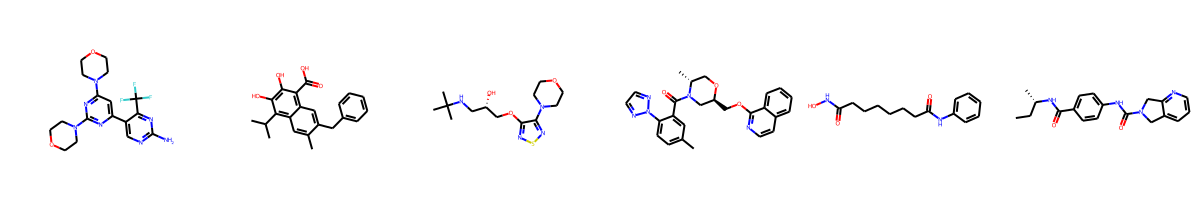

In [6]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in idg_sample.cansmi], molsPerRow=6)

* __DrugCentral__

In [7]:
drugcentral_sample = pd.read_sql("SELECT * FROM drugcentral WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
drugcentral_sample

,id,name,cas_reg_no,smiles,inchikey,inchi,formula,molweight,cansmi,mol_id
0,3743,exiproben,26281-69-6,CCCCCCOCC(O)COC1=C(C=CC=C1)C(O)=O,YTPJKQPMTSNTGI-UHFFFAOYSA-N,InChI=1S/C16H24O5/c1-2-3-4-7-10-20-11-13(17)12...,C16H24O5,296.363,CCCCCCOCC(O)COc1ccccc1C(=O)O,308843
1,2051,aminosalicylic acid hydrazide,6946-29-8,NNC(=O)C1=C(O)C=C(N)C=C1,FYZGXAKJVDHGDR-UHFFFAOYSA-N,InChI=1S/C7H9N3O2/c8-4-1-2-5(6(11)3-4)7(12)10-...,C7H9N3O2,167.168,NNC(=O)c1ccc(N)cc1O,309562
2,2228,polythiazide,346-18-9,CN1C(CSCC(F)(F)F)NC2=C(C=C(C(Cl)=C2)S(N)(=O)=O...,CYLWJCABXYDINA-UHFFFAOYSA-N,InChI=1S/C11H13ClF3N3O4S3/c1-18-10(4-23-5-11(1...,C11H13ClF3N3O4S3,439.870,CN1C(CSCC(F)(F)F)Nc2cc(Cl)c(S(N)(=O)=O)cc2S1(=...,295215
3,652,cinitapride,66564-14-5,CCOC1=C(C=C(C(N)=C1)[N+]([O-])=O)C(=O)NC1CCN(C...,ZDLBNXXKDMLZMF-UHFFFAOYSA-N,InChI=1S/C21H30N4O4/c1-2-29-20-13-18(22)19(25(...,C21H30N4O4,402.495,CCOc1cc(N)c([N+](=O)[O-])cc1C(=O)NC1CCN(CC2CC=...,279425
4,156,amifostine,20537-88-6,NCCCNCCSP(O)(O)=O,JKOQGQFVAUAYPM-UHFFFAOYSA-N,"InChI=1S/C5H15N2O3PS/c6-2-1-3-7-4-5-12-11(8,9)...",C5H15N2O3PS,214.220,NCCCNCCSP(=O)(O)O,257810
5,2355,ramelteon,196597-26-9,CCC(=O)NCC[C@@H]1CCC2=C1C1=C(OCC1)C=C2,YLXDSYKOBKBWJQ-LBPRGKRZSA-N,InChI=1S/C16H21NO2/c1-2-15(18)17-9-7-12-4-3-11...,C16H21NO2,259.349,CCC(=O)NCC[C@@H]1CCc2ccc3c(c21)CCO3,3629


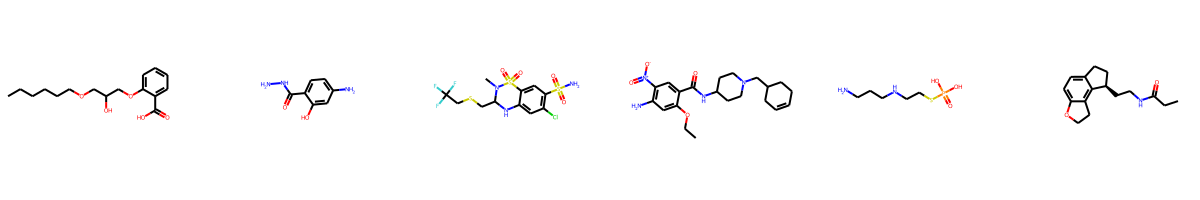

In [8]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in drugcentral_sample.cansmi], molsPerRow=6)

* __LINCS__

In [9]:
lincs_sample = pd.read_sql("SELECT * FROM lincs WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
lincs_sample

,id,pert_name,target,moa,smiles,inchi_key,compound_aliases,sig_count,cansmi,mol_id
0,BRD-K17144037,BRD-K17144037,None,None,C[C@H](CO)N1C[C@H](C)[C@H](CN(C)C(=O)CCCN(C)C)...,None,None,3,C[C@H]1CCCCO[C@@H](CN(C)C(=O)CCCN(C)C)[C@@H](C...,273832
1,BRD-K31210612,BRD-K31210612,None,None,CC=Cc1ccc2c(O[C@H](CN(C)CC3CCOCC3)[C@@H](C)CN(...,None,None,1,CC=Cc1ccc2c(c1)O[C@H](CN(C)CC1CCOCC1)[C@@H](C)...,253228
2,BRD-K47114202,chlorogenic-acid,None,None,O[C@@H]1C[C@](O)(C[C@@H](OC(=O)C=Cc2ccc(O)c(O)...,CWVRJTMFETXNAD-JUHZACGLSA-N,None,2,O=C(C=Cc1ccc(O)c(O)c1)O[C@@H]1C[C@](O)(C(=O)O)...,256466
3,BRD-M59406954,BRD-M59406954,None,None,CC=Cc1ccc2n(C[C@@H]3[C@@H](CO)[C@H](C(=O)NC4CC...,MAYPJGPMDPCVRU-HNCSKEEBSA-N,None,6,CC=Cc1ccc2n(c1=O)C[C@@H]1[C@@H](CO)[C@H](C(=O)...,263108
4,BRD-K32083350,BRD-K32083350,None,None,CCCN1[C@@H]2Cn3c(ccc(C=Cc4ccccc4)c3=O)[C@H]1[C...,WELAGKOSDCWUQO-TWSJCRGDSA-N,None,4,CCCN1[C@@H]2Cn3c(ccc(C=Cc4ccccc4)c3=O)[C@H]1[C...,268402
5,BRD-K14889526,BRD-K14889526,None,None,CCS(=O)(=O)N1Cc2cc(nc(c2[C@@H]1CCO)-c1cccc(c1)...,HISLUEZGKSFRIL-QHCPKHFHSA-N,None,2,CCS(=O)(=O)N1Cc2cc(C(=O)NCCOC)nc(-c3cccc(-c4cc...,272770


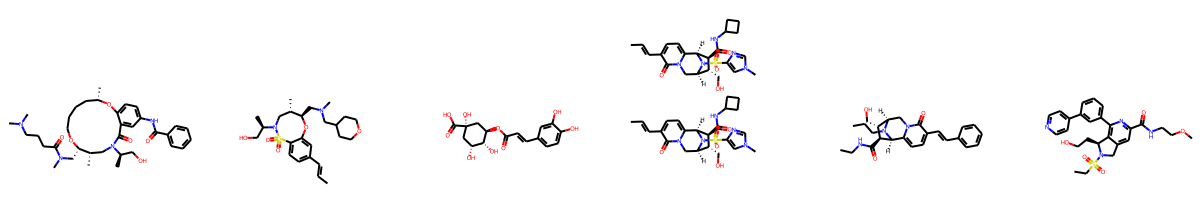

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in lincs_sample.cansmi], molsPerRow=6)

* __RefMet__

In [11]:
refmet_sample = pd.read_sql("SELECT * FROM refmet WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
refmet_sample

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid,cansmi,mol_id
0,Tyr-Ala-Arg,Organic acids,Amino acids and peptides,Tripeptides,C18H28N6O5,408.212119,NIHNMOSRSAYZIT-BPNCWPANSA-N,C[C@@H](NC(=O)[C@H](N)Cc1ccc(O)cc1)C(=O)N[C@H]...,49864302,C[C@@H](NC(=O)[C@H](N)Cc1ccc(O)cc1)C(=O)N[C@H]...,278235
1,Hentriacontylic acid,Fatty Acyls,Fatty acids,Saturated FA,C31H62O2,466.47497999999996,ONLMUMPTRGEPCH-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(O)=O,37982,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(=O)O,290678
2,(S)-4-Nonanolide,Organoheterocyclic compounds,Lactones,Gamma butyrolactones,C9H16O2,156.11503000000002,OALYTRUKMRCXNH-QMMMGPOBSA-N,CCCCC[C@@H]1CCC(=O)O1 |&1:5|,441574,CCCCC[C@@H]1CCC(=O)O1,286764
3,Acetyl-CoA,Fatty Acyls,Fatty esters,Acyl CoAs,C23H38N7O17P3S,809.125784,ZSLZBFCDCINBPY-ZSJPKINUSA-N,CC(=O)SCCNC(=O)CCNC(=O)[C@@H](O)C(C)(C)COP(O)(...,444493,CC(=O)SCCNC(=O)CCNC(=O)[C@@H](O)C(C)(C)COP(=O)...,282458
4,Phe-Ala-Glu,Organic acids,Amino acids and peptides,Tripeptides,C17H23N3O6,365.158687,CYZBFPYMSJGBRL-DRZSPHRISA-N,C[C@@H](NC(=O)[C@H](N)Cc1ccccc1)C(=O)N[C@H](CC...,145457124,C[C@@H](NC(=O)[C@H](N)Cc1ccccc1)C(=O)N[C@H](CC...,289030
5,Diphenyl phthalate,Benzenoids,Benzoic acids,Benzoic acid esters,C20H14O4,318.08921000000004,DWNAQMUDCDVSLT-UHFFFAOYSA-N,O=C(Oc1ccccc1)c1ccccc1C(=O)Oc1ccccc1,6778,O=C(Oc1ccccc1)c1ccccc1C(=O)Oc1ccccc1,276696


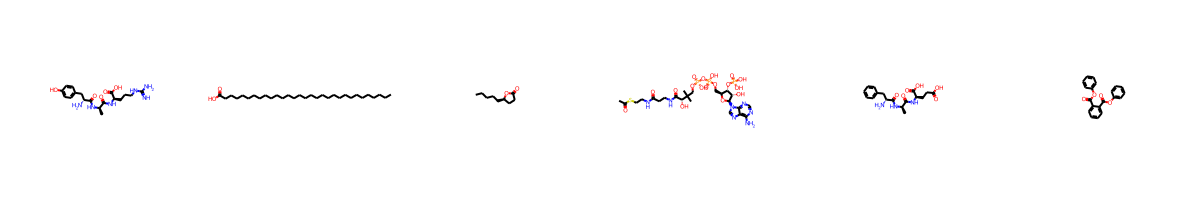

In [12]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in refmet_sample.cansmi], molsPerRow=6)

* __GlyGen__

In [13]:
glygen_sample = pd.read_sql("SELECT * FROM glygen WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
glygen_sample

,glycan_type,mass_pme,number_monosaccharides,fully_determined,wurcs,byonic,glytoucan_ac,missing_score,glycam,inchi,...,smiles,mass,glygen_id,inchi_key,glytoucan_id,pubchem_cid,pubchem_sid,chebi_id,cansmi,mol_id
0,Saccharide,1556.79,7,nan,"WURCS=2.0/4,7,6/[a2122h-1x_1-5_2*NCC/3=O][a212...",Hex(5)HexNAc(2) % 1234.43342741,G37453ZD,99,nan,InChI=1S/C46H78N2O36/c1-10(54)47-19-26(61)36(1...,...,CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O[C@@H...,1234.43,17196,IZLTYXPQAZGAME-WDAJZLKYSA-N,G37453ZD,91856245.0,252289223.0,150062.0,CC(=O)N[C@H]1C(O)O[C@H](CO)[C@@H](O[C@@H]2O[C@...,307790
1,Saccharide,1264.64,5,nan,"WURCS=2.0/4,5,4/[a2122h-1x_1-5][a2112h-1b_1-5]...",Hex(3)HexNAc(1)NeuAc(1) % 998.34382444,G28800UK,139,nan,InChI=1S/C37H62N2O29/c1-9(45)38-17-11(47)3-37(...,...,CC(=O)N[C@@H]1[C@H](C[C@@](O[C@H]1[C@@H]([C@@H...,998.34,16783,JJDJLGKBNIXJPW-UWQVXSKMSA-N,G28800UK,14647417.0,252281356.0,148518.0,CC(=O)N[C@H]1[C@H](O[C@H]2[C@@H](O)[C@@H](CO)O...,304077
2,Saccharide,1908.89,8,yes,"WURCS=2.0/4,8,7/[a2122h-1b_1-5_2*NCC/3=O][a112...",Hex(4)HexNAc(4)S(1) % 1558.49616371,G85891FA,0,DGalpNAc[4S]b1-4DGlcpNAcb1-2DManpa1-3[DManpa1-...,InChI=1S/C56H94N4O44S/c1-13(67)57-25-33(75)43(...,...,CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O)CO)O...,1558.50,24541,DZRUQQDIVHMHIQ-DLNBTVRASA-N,G85891FA,91853588.0,252286031.0,154441.0,CC(=O)N[C@H]1[C@H](O[C@H]2[C@@H](O)[C@H](O)[C@...,303572
3,Saccharide,2670.36,12,nan,"WURCS=2.0/6,12,11/[a2122h-1x_1-5_2*NCC/3=O][a2...",Hex(6)HexNAc(5)dHex(1) % 2151.78227759,G50846BW,58,nan,InChI=1S/C82H137N5O60/c1-18-40(101)52(113)56(1...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)OC[C@@H]2[...,2151.78,18539,ZXDOBBASPAWRAF-PPFKYKPCSA-N,G50846BW,91857516.0,252290732.0,151988.0,CC(=O)N[C@H]1C(O)O[C@H](CO[C@@H]2O[C@@H](C)[C@...,303141
4,Saccharide,658.34,3,nan,"WURCS=2.0/2,3,2/[a2122h-1x_1-5][a2112h-1a_1-5]...",Hex(3) % 504.1690352,G49813VF,233,nan,InChI=1S/C18H32O16/c19-1-4-7(21)11(25)13(27)18...,...,C([C@@H]1[C@@H]([C@@H]([C@H]([C@H](O1)O[C@H]2[...,504.17,32042,GEMKLMOVLYWXIB-FXJSCTKQSA-N,G49813VF,91851749.0,252283837.0,151885.0,OC[C@H]1O[C@H](OC[C@H]2OC(O)[C@H](O)[C@@H](O)[...,303105
5,Saccharide,3772.91,17,nan,"WURCS=2.0/6,17,16/[a2122h-1x_1-5_2*NCC/3=O][a2...",Hex(9)HexNAc(7)dHex(1) % 3044.09949331,G05654CV,41,nan,InChI=1S/C116H193N7O85/c1-25-56(145)73(162)78(...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)OC[C@@H]2[...,3044.10,18043,IZSZAZVIFVRXNO-GLSJONIBSA-N,G05654CV,71298049.0,252282554.0,146849.0,CC(=O)N[C@H]1C(O)O[C@H](CO[C@@H]2O[C@@H](C)[C@...,301403


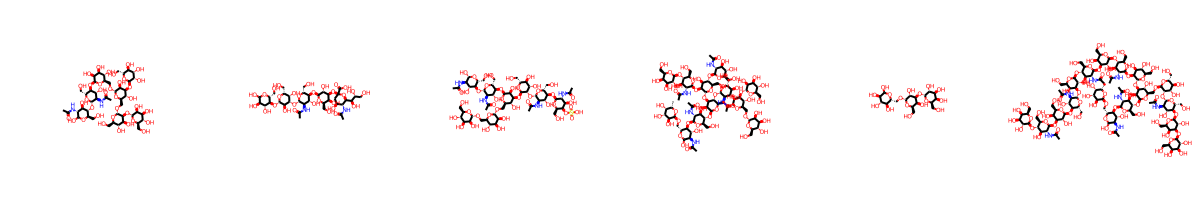

In [14]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in glygen_sample.cansmi], molsPerRow=6)

* __ReproTox__

In [15]:
reprotox_sample = pd.read_sql("SELECT * FROM reprotox WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
reprotox_sample

,ls_id,cas_rn,pubchem_cid,smiles,term,cansmi,mol_id
0,LS-118441,83919-23-7,441336,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,CV,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,4194
1,LS-848,143-33-9,8929,[Na+].[C-]#N,CV,[C-]#N.[Na+],15
2,LS-124899,2079-89-2,5462653,NCCC#N.NCCC#N.OC(=O)\C=C\C(O)=O,CNS,N#CCCN.N#CCCN.O=C(O)/C=C/C(=O)O,310993
3,LS-34156,1622-61-3,2802,[O-][N+](=O)c1ccc2NC(=O)CN=C(c3ccccc3Cl)c2c1,CNS,O=C1CN=C(c2ccccc2Cl)c2cc([N+](=O)[O-])ccc2N1,652
4,LS-7681,816-57-9,13157,CCCN(N=O)C(N)=O,CNS,CCCN(N=O)C(N)=O,310942
5,LS-659,121-92-6,8497,OC(=O)c1cccc(c1)[N+]([O-])=O,CNS,O=C(O)c1cccc([N+](=O)[O-])c1,310839


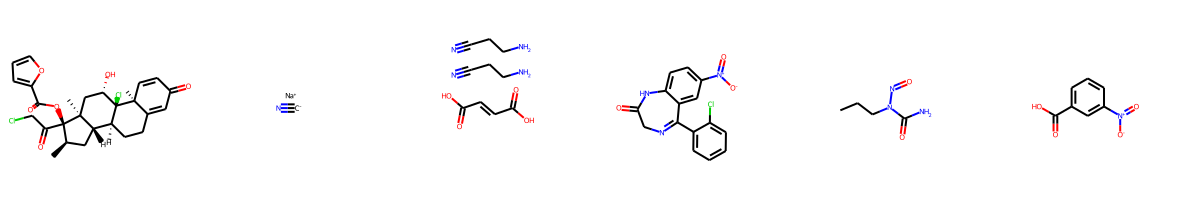

In [16]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in reprotox_sample.cansmi], molsPerRow=6)

### Chemical similarity search

In [17]:
hits = rdktools.db.MolSimilaritySearch("NCCc1cc(O)c(O)cc1", "mols", dbcon)
hits.head(12)

,cansmi,name,tanimoto
0,Cl.NCCc1ccc(O)c(O)c1,None,1.000000
1,NCCc1ccc(O)c(O)c1,None,1.000000
2,NCCc1ccc(O)c(O)c1,None,1.000000
3,NCCc1cc(O)c(O)c(O)c1,None,0.921986
4,NCCc1cccc(O)c1,None,0.853846
5,CC(=O)NCCc1ccc(O)c(O)c1,None,0.817610
6,OCCc1ccc(O)c(O)c1,None,0.784722
7,Cl.NCCc1cc(O)c(O)cc1O,None,0.778443
8,NCCc1cc(O)c(O)cc1O,None,0.778443
9,O=CCc1ccc(O)c(O)c1,None,0.773973


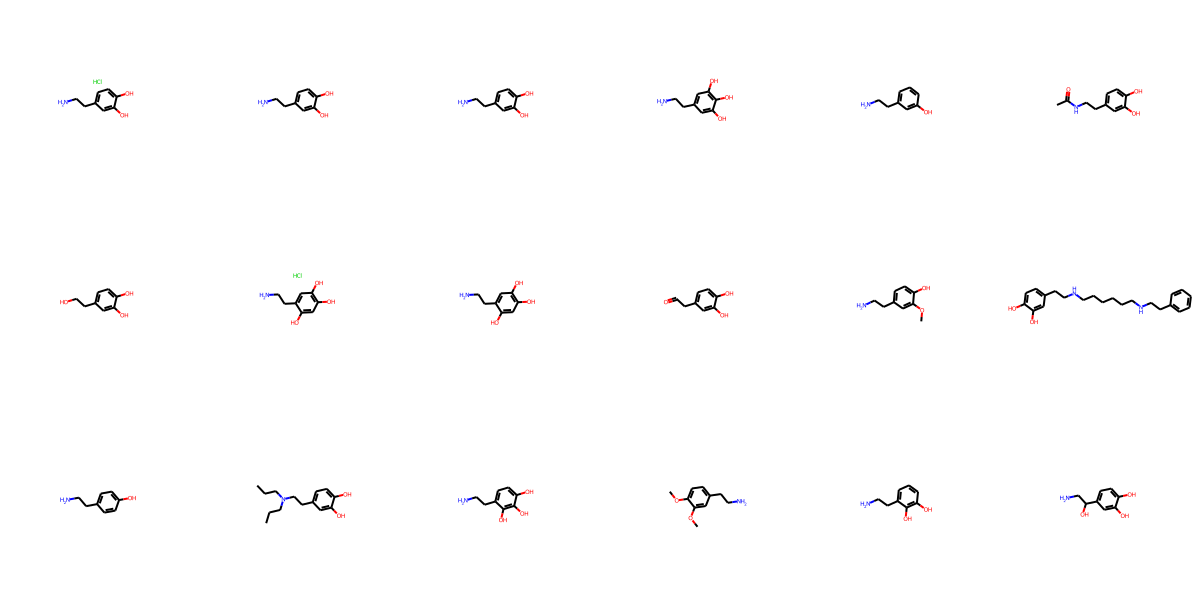

In [18]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in hits.cansmi[:18]], molsPerRow=6)

## Cansmi commonality

Comparing datasets by canonical SMILES.

In [19]:
cansmis={};
for table in ("idg", "drugcentral", "lincs", "glygen", "refmet", "reprotox"):
  cansmis[table] = set(pd.read_sql(f"SELECT DISTINCT cansmi FROM {table} WHERE cansmi IS NOT NULL", dbcon)["cansmi"])
  print(f"{table:>12}: {len(cansmis[table]):6d} cansmis")

         idg: 249512 cansmis
 drugcentral:   4097 cansmis
       lincs:  26821 cansmis
      glygen:   9695 cansmis
      refmet:  23114 cansmis
    reprotox:    698 cansmis


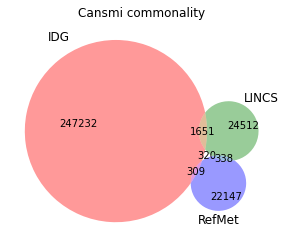

In [20]:
v3 = venn3([cansmis["idg"], cansmis["lincs"], cansmis["refmet"]], ('IDG', 'LINCS', 'RefMet'), set_colors=("r", "g", "b"), alpha=0.4)
plt.title("Cansmi commonality")
plt.show()

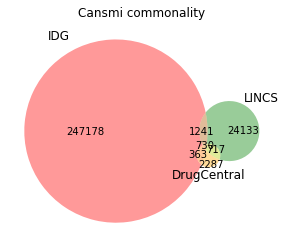

In [21]:
v3 = venn3([cansmis["idg"], cansmis["lincs"], cansmis["drugcentral"]], ('IDG', 'LINCS', 'DrugCentral'), set_colors=("r", "g", "orange"), alpha=0.4)
plt.title("Cansmi commonality")
plt.show()

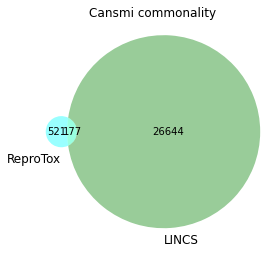

In [22]:
plt.figure(figsize=(8,4))
v2 = venn2([cansmis["reprotox"], cansmis["lincs"]], ('ReproTox', 'LINCS'), set_colors=("cyan", "g"), normalize_to=2)
plt.title("Cansmi commonality")
plt.show()